In [1]:
import torch as t 
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pylab as plt
from torch.nn.utils import clip_grad_value_
%matplotlib inline
import pickle
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
import tqdm
import os
import sys
sys.path.append('../src/')

In [3]:
from sklearn.datasets import load_wine
wine_X , wine_Y = load_wine(return_X_y=True)


In [4]:
rs = np.random.RandomState(42)
ids = list(range(len(wine_X)))
rs.shuffle(ids)

train_X, test_X = wine_X[ids[:len(ids)*4//5]], wine_X[ids[len(ids)*4//5:]]
train_Y, test_Y = wine_Y[ids[:len(ids)*4//5]], wine_Y[ids[len(ids)*4//5:]]

mean = np.mean(train_X, 0)
std = np.std(train_X, 0)

train_X = (train_X - mean)/std
test_X = (test_X - mean)/std




In [5]:
import importlib 
import var_net as var_net
import base_net as base_net
import mnist_utils as utils
importlib.reload(utils)
importlib.reload(var_net)
importlib.reload(base_net)



<module 'base_net' from '/home/leginpc/reps/VarHyperNet/code/wine/../src/base_net.py'>

In [6]:
device = 'cuda' # cuda or cpu
device = t.device(device)
if device == 'cuda':
    t.backends.cudnn.deterministic = True
    t.backends.cudnn.benchmark = False

In [7]:
init_log_sigma = -3.0 # логарифм дисперсии вариационного распределения при инициализации
prior_sigma = 1.0 # априорная дисперсия
epoch_num = 200 #количество эпох
lamb = [10**2, 10**3, 10**4, 10**5, 10**6]#[0.001, 0.01, 0.1,  1, 10, 100.0]

acc_delete = [] 
start_num = 5
path_to_save = 'saved_wine'

if not os.path.exists(path_to_save):
    os.mkdir(path_to_save)

In [8]:
train_X = t.tensor(train_X).to(device)
test_X = t.tensor(test_X).to(device)
train_Y = t.tensor(train_Y).to(device)
test_Y = t.tensor(test_Y).to(device)


train_data = TensorDataset(train_X.float(),train_Y)
train_loader = DataLoader(train_data) 

test_data = TensorDataset(test_X.float(),test_Y)
test_loader = DataLoader(test_data) 

        

In [ ]:
t.manual_seed(0)
for lam in lamb[::-1]:
    for start in range(start_num):                    
            net = var_net.VarNet(base_net.BaseLayer(13, 3, device, prior_sigma=prior_sigma,
                                          act=lambda x:x))
            
            net = net.to(device)
            optim = t.optim.Adam(net.parameters(), lr=5e-4)
            loss_fn = nn.CrossEntropyLoss().to(device)            
            for e in range(epoch_num):
                #if e > 100:
                #    optim = t.optim.Adam(net.parameters(), lr=1e-3)
                label = 'lambda {}, epoch {}: '.format(lam, e)                
                utils.train_batches_net(train_loader,len(train_data),  net, device, loss_fn, optim, lam, label)
                if e%5 == 0:
                    print (utils.test_acc_net(net, device, test_loader))
            t.save(net.state_dict(), os.path.join(path_to_save, 'base_net_lam_{}_start_{}.cpk'.format(lam, start)))

lambda 1000000, epoch 0: 78957.516: 100%|██████████| 142/142 [00:00<00:00, 590.69it/s]


0.3055555555555556


lambda 1000000, epoch 5: 34806.152: 100%|██████████| 142/142 [00:00<00:00, 670.03it/s]


0.3055555555555556


lambda 1000000, epoch 10: 22793.498: 100%|██████████| 142/142 [00:00<00:00, 636.21it/s]


0.3055555555555556


lambda 1000000, epoch 15: 14686.872: 100%|██████████| 142/142 [00:00<00:00, 654.82it/s]


0.3055555555555556


lambda 1000000, epoch 20: 8355.024: 100%|██████████| 142/142 [00:00<00:00, 681.58it/s]


0.3055555555555556


lambda 1000000, epoch 25: 3797.6223: 100%|██████████| 142/142 [00:00<00:00, 690.76it/s]


0.3055555555555556


lambda 1000000, epoch 30: 1015.294: 100%|██████████| 142/142 [00:00<00:00, 699.34it/s] 


0.3055555555555556


lambda 1000000, epoch 35: 8.044069: 100%|██████████| 142/142 [00:00<00:00, 669.10it/s]


0.4444444444444444


lambda 1000000, epoch 40: 1.0999794: 100%|██████████| 142/142 [00:00<00:00, 677.74it/s]


0.5833333333333334


lambda 1000000, epoch 45: 1.099924: 100%|██████████| 142/142 [00:00<00:00, 645.85it/s] 


0.6388888888888888


lambda 1000000, epoch 50: 1.0999981: 100%|██████████| 142/142 [00:00<00:00, 673.20it/s]


0.5833333333333334


lambda 1000000, epoch 55: 1.0999968: 100%|██████████| 142/142 [00:00<00:00, 637.62it/s]


0.5833333333333334


lambda 1000000, epoch 60: 1.100031: 100%|██████████| 142/142 [00:00<00:00, 661.57it/s] 


0.5555555555555556


lambda 1000000, epoch 65: 1.0999453: 100%|██████████| 142/142 [00:00<00:00, 693.87it/s]


0.5555555555555556


lambda 1000000, epoch 70: 1.0999461: 100%|██████████| 142/142 [00:00<00:00, 653.81it/s]


0.6666666666666666


lambda 1000000, epoch 75: 1.1000513: 100%|██████████| 142/142 [00:00<00:00, 661.41it/s]


0.5555555555555556


lambda 1000000, epoch 80: 1.0999379: 100%|██████████| 142/142 [00:00<00:00, 679.63it/s]


0.4444444444444444


lambda 1000000, epoch 85: 1.1000363: 100%|██████████| 142/142 [00:00<00:00, 663.30it/s]


0.6944444444444444


lambda 1000000, epoch 90: 1.1000392: 100%|██████████| 142/142 [00:00<00:00, 575.16it/s]


0.5555555555555556


lambda 1000000, epoch 95: 1.1000053: 100%|██████████| 142/142 [00:00<00:00, 673.37it/s]


0.6388888888888888


lambda 1000000, epoch 100: 1.0999994: 100%|██████████| 142/142 [00:00<00:00, 679.31it/s]


0.5833333333333334


lambda 1000000, epoch 105: 1.0999796: 100%|██████████| 142/142 [00:00<00:00, 665.59it/s]


0.5833333333333334


lambda 1000000, epoch 110: 1.099951: 100%|██████████| 142/142 [00:00<00:00, 727.71it/s]


0.6111111111111112


lambda 1000000, epoch 115: 1.0999676: 100%|██████████| 142/142 [00:00<00:00, 671.66it/s]


0.3611111111111111


lambda 1000000, epoch 120: 1.0999753: 100%|██████████| 142/142 [00:00<00:00, 684.11it/s]


0.4722222222222222


lambda 1000000, epoch 125: 1.0999247: 100%|██████████| 142/142 [00:00<00:00, 674.55it/s]


0.5277777777777778


lambda 1000000, epoch 130: 1.0999931: 100%|██████████| 142/142 [00:00<00:00, 690.18it/s]


0.8055555555555556


lambda 1000000, epoch 135: 1.1000575: 100%|██████████| 142/142 [00:00<00:00, 674.22it/s]


0.5277777777777778


lambda 1000000, epoch 140: 1.100023: 100%|██████████| 142/142 [00:00<00:00, 660.04it/s] 


0.5277777777777778


lambda 1000000, epoch 145: 1.0999846: 100%|██████████| 142/142 [00:00<00:00, 661.60it/s]


0.5277777777777778


lambda 1000000, epoch 150: 1.1000317: 100%|██████████| 142/142 [00:00<00:00, 695.08it/s]


0.5555555555555556


lambda 1000000, epoch 155: 1.0999498: 100%|██████████| 142/142 [00:00<00:00, 688.07it/s]


0.5


lambda 1000000, epoch 160: 1.0999839: 100%|██████████| 142/142 [00:00<00:00, 683.45it/s]


0.6111111111111112


lambda 1000000, epoch 165: 1.0999459: 100%|██████████| 142/142 [00:00<00:00, 673.90it/s]


0.7222222222222222


lambda 1000000, epoch 170: 1.09994: 100%|██████████| 142/142 [00:00<00:00, 687.04it/s]  


0.5277777777777778


lambda 1000000, epoch 175: 1.0999467: 100%|██████████| 142/142 [00:00<00:00, 657.63it/s]


0.6944444444444444


lambda 1000000, epoch 180: 1.0999771: 100%|██████████| 142/142 [00:00<00:00, 685.15it/s]


0.5277777777777778


lambda 1000000, epoch 185: 1.100002: 100%|██████████| 142/142 [00:00<00:00, 684.52it/s] 


0.6666666666666666


lambda 1000000, epoch 190: 1.1000383: 100%|██████████| 142/142 [00:00<00:00, 682.05it/s]


0.5


lambda 1000000, epoch 195: 1.0999689: 100%|██████████| 142/142 [00:00<00:00, 676.80it/s]


0.5833333333333334


lambda 1000000, epoch 0: 33817.613: 100%|██████████| 142/142 [00:00<00:00, 668.70it/s]


0.3611111111111111


lambda 1000000, epoch 5: 1969.4756: 100%|██████████| 142/142 [00:00<00:00, 650.58it/s]


0.2777777777777778


lambda 1000000, epoch 10: 1.0998576: 100%|██████████| 142/142 [00:00<00:00, 701.06it/s]


0.5555555555555556


lambda 1000000, epoch 15: 1.0998806: 100%|██████████| 142/142 [00:00<00:00, 688.99it/s]


0.5555555555555556


lambda 1000000, epoch 20: 1.0999888: 100%|██████████| 142/142 [00:00<00:00, 662.12it/s]


0.6388888888888888


lambda 1000000, epoch 25: 1.1000175: 100%|██████████| 142/142 [00:00<00:00, 649.51it/s]


0.5


lambda 1000000, epoch 30: 1.1000481: 100%|██████████| 142/142 [00:00<00:00, 627.74it/s]


0.4444444444444444


lambda 1000000, epoch 35: 1.0999838: 100%|██████████| 142/142 [00:00<00:00, 654.07it/s]


0.5833333333333334


lambda 1000000, epoch 40: 1.1000042: 100%|██████████| 142/142 [00:00<00:00, 684.45it/s]


0.5555555555555556


lambda 1000000, epoch 45: 1.1000164: 100%|██████████| 142/142 [00:00<00:00, 671.14it/s]


0.5277777777777778


lambda 1000000, epoch 50: 1.0999365: 100%|██████████| 142/142 [00:00<00:00, 686.12it/s]


0.4166666666666667


lambda 1000000, epoch 55: 1.0999836: 100%|██████████| 142/142 [00:00<00:00, 672.01it/s]


0.5


lambda 1000000, epoch 60: 1.1000131: 100%|██████████| 142/142 [00:00<00:00, 698.59it/s]


0.5277777777777778


lambda 1000000, epoch 65: 1.0999959: 100%|██████████| 142/142 [00:00<00:00, 673.41it/s]


0.4722222222222222


lambda 1000000, epoch 70: 1.1000495: 100%|██████████| 142/142 [00:00<00:00, 658.28it/s]


0.3888888888888889


lambda 1000000, epoch 75: 1.0999714: 100%|██████████| 142/142 [00:00<00:00, 665.10it/s]


0.5277777777777778


lambda 1000000, epoch 80: 1.1000419: 100%|██████████| 142/142 [00:00<00:00, 651.27it/s]


0.5277777777777778


lambda 1000000, epoch 85: 1.0999649: 100%|██████████| 142/142 [00:00<00:00, 679.50it/s]


0.3888888888888889


lambda 1000000, epoch 90: 1.1000412: 100%|██████████| 142/142 [00:00<00:00, 689.77it/s]


0.4722222222222222


lambda 1000000, epoch 95: 1.0999556: 100%|██████████| 142/142 [00:00<00:00, 649.38it/s]


0.6944444444444444


lambda 1000000, epoch 100: 1.1000048: 100%|██████████| 142/142 [00:00<00:00, 676.73it/s]


0.6388888888888888


lambda 1000000, epoch 105: 1.0999378: 100%|██████████| 142/142 [00:00<00:00, 693.56it/s]


0.3611111111111111


lambda 1000000, epoch 110: 1.1000478: 100%|██████████| 142/142 [00:00<00:00, 696.37it/s]


0.5555555555555556


lambda 1000000, epoch 115: 1.1000339: 100%|██████████| 142/142 [00:00<00:00, 674.49it/s]


0.4722222222222222


lambda 1000000, epoch 120: 1.0999386: 100%|██████████| 142/142 [00:00<00:00, 676.51it/s]


0.6111111111111112


lambda 1000000, epoch 125: 1.0999559: 100%|██████████| 142/142 [00:00<00:00, 683.83it/s]


0.4722222222222222


lambda 1000000, epoch 130: 1.1000307: 100%|██████████| 142/142 [00:00<00:00, 700.96it/s]


0.4722222222222222


lambda 1000000, epoch 135: 1.1000273: 100%|██████████| 142/142 [00:00<00:00, 675.85it/s]


0.6388888888888888


lambda 1000000, epoch 140: 1.1000369: 100%|██████████| 142/142 [00:00<00:00, 664.36it/s]


0.5833333333333334


lambda 1000000, epoch 145: 1.0999709: 100%|██████████| 142/142 [00:00<00:00, 686.08it/s]


0.4722222222222222


lambda 1000000, epoch 150: 1.1000044: 100%|██████████| 142/142 [00:00<00:00, 704.16it/s]


0.6111111111111112


lambda 1000000, epoch 155: 1.0999086: 100%|██████████| 142/142 [00:00<00:00, 686.38it/s]


0.6111111111111112


lambda 1000000, epoch 160: 1.100016: 100%|██████████| 142/142 [00:00<00:00, 664.29it/s] 


0.6111111111111112


lambda 1000000, epoch 165: 1.0999695: 100%|██████████| 142/142 [00:00<00:00, 661.80it/s]


0.5833333333333334


lambda 1000000, epoch 170: 1.1000044: 100%|██████████| 142/142 [00:00<00:00, 665.76it/s]


0.75


lambda 1000000, epoch 175: 1.0998883: 100%|██████████| 142/142 [00:00<00:00, 651.52it/s]


0.6111111111111112


lambda 1000000, epoch 180: 1.1000417: 100%|██████████| 142/142 [00:00<00:00, 662.35it/s]


0.5833333333333334


lambda 1000000, epoch 185: 1.0999483: 100%|██████████| 142/142 [00:00<00:00, 701.66it/s]


0.5277777777777778


lambda 1000000, epoch 190: 1.0999291: 100%|██████████| 142/142 [00:00<00:00, 649.37it/s]


0.6111111111111112


lambda 1000000, epoch 195: 1.0999694: 100%|██████████| 142/142 [00:00<00:00, 672.38it/s]


0.6944444444444444


lambda 1000000, epoch 0: 47926.805: 100%|██████████| 142/142 [00:00<00:00, 677.52it/s]


0.4444444444444444


lambda 1000000, epoch 5: 7426.5864: 100%|██████████| 142/142 [00:00<00:00, 668.67it/s]


0.3888888888888889


lambda 1000000, epoch 10: 1427.4817: 100%|██████████| 142/142 [00:00<00:00, 677.06it/s]


0.6388888888888888


lambda 1000000, epoch 15: 67.06215: 100%|██████████| 142/142 [00:00<00:00, 678.12it/s] 


0.5833333333333334


lambda 1000000, epoch 20: 1.0999202: 100%|██████████| 142/142 [00:00<00:00, 667.15it/s]


0.6111111111111112


lambda 1000000, epoch 25: 1.0999713: 100%|██████████| 142/142 [00:00<00:00, 662.37it/s]


0.5555555555555556


lambda 1000000, epoch 30: 1.1000009: 100%|██████████| 142/142 [00:00<00:00, 662.18it/s]


0.5277777777777778


lambda 1000000, epoch 35: 1.0999191: 100%|██████████| 142/142 [00:00<00:00, 681.33it/s]


0.5


lambda 1000000, epoch 40: 1.0999801: 100%|██████████| 142/142 [00:00<00:00, 672.10it/s]


0.6388888888888888


lambda 1000000, epoch 45: 1.1000276: 100%|██████████| 142/142 [00:00<00:00, 674.25it/s]


0.6388888888888888


lambda 1000000, epoch 50: 1.1000233: 100%|██████████| 142/142 [00:00<00:00, 685.30it/s]


0.6944444444444444


lambda 1000000, epoch 55: 1.1000319: 100%|██████████| 142/142 [00:00<00:00, 623.20it/s]


0.6111111111111112


lambda 1000000, epoch 60: 1.1000315: 100%|██████████| 142/142 [00:00<00:00, 701.29it/s]


0.6111111111111112


lambda 1000000, epoch 65: 1.0999732: 100%|██████████| 142/142 [00:00<00:00, 702.09it/s]


0.6666666666666666


lambda 1000000, epoch 70: 1.1000003: 100%|██████████| 142/142 [00:00<00:00, 681.94it/s]


0.5277777777777778


lambda 1000000, epoch 75: 1.0999683: 100%|██████████| 142/142 [00:00<00:00, 638.00it/s]


0.5555555555555556


lambda 1000000, epoch 80: 1.099952: 100%|██████████| 142/142 [00:00<00:00, 664.52it/s]


0.4166666666666667


lambda 1000000, epoch 85: 1.0999857: 100%|██████████| 142/142 [00:00<00:00, 689.30it/s]


0.6111111111111112


lambda 1000000, epoch 90: 1.0999739: 100%|██████████| 142/142 [00:00<00:00, 700.27it/s]


0.6111111111111112


lambda 1000000, epoch 95: 1.0999858: 100%|██████████| 142/142 [00:00<00:00, 684.14it/s]


0.5555555555555556


lambda 1000000, epoch 100: 1.0999826: 100%|██████████| 142/142 [00:00<00:00, 713.78it/s]


0.5277777777777778


lambda 1000000, epoch 105: 1.0999662: 100%|██████████| 142/142 [00:00<00:00, 700.93it/s]


0.5833333333333334


lambda 1000000, epoch 110: 1.0999893: 100%|██████████| 142/142 [00:00<00:00, 639.55it/s]


0.5


lambda 1000000, epoch 115: 1.0999964: 100%|██████████| 142/142 [00:00<00:00, 666.55it/s]


0.4722222222222222


lambda 1000000, epoch 120: 1.1000217: 100%|██████████| 142/142 [00:00<00:00, 657.73it/s]


0.5277777777777778


lambda 1000000, epoch 125: 1.1000437: 100%|██████████| 142/142 [00:00<00:00, 612.57it/s]


0.3333333333333333


lambda 1000000, epoch 130: 1.100025: 100%|██████████| 142/142 [00:00<00:00, 644.79it/s] 


0.5


lambda 1000000, epoch 135: 1.1000067: 100%|██████████| 142/142 [00:00<00:00, 671.43it/s]


0.4166666666666667


lambda 1000000, epoch 140: 1.0999954: 100%|██████████| 142/142 [00:00<00:00, 680.45it/s]


0.5


lambda 1000000, epoch 145: 1.1000266: 100%|██████████| 142/142 [00:00<00:00, 645.28it/s]


0.6388888888888888


lambda 1000000, epoch 150: 1.0999942: 100%|██████████| 142/142 [00:00<00:00, 657.06it/s]


0.5277777777777778


lambda 1000000, epoch 155: 1.09995: 100%|██████████| 142/142 [00:00<00:00, 702.10it/s] 


0.3888888888888889


lambda 1000000, epoch 160: 1.1000197: 100%|██████████| 142/142 [00:00<00:00, 665.63it/s]


0.4722222222222222


lambda 1000000, epoch 165: 1.0999607: 100%|██████████| 142/142 [00:00<00:00, 662.53it/s]


0.5


lambda 1000000, epoch 170: 1.0999466: 100%|██████████| 142/142 [00:00<00:00, 704.48it/s]


0.3888888888888889


lambda 1000000, epoch 175: 1.1000444: 100%|██████████| 142/142 [00:00<00:00, 688.93it/s]


0.6666666666666666


lambda 1000000, epoch 180: 1.100001: 100%|██████████| 142/142 [00:00<00:00, 667.74it/s] 


0.5277777777777778


lambda 1000000, epoch 185: 1.0999421: 100%|██████████| 142/142 [00:00<00:00, 673.85it/s]


0.5


lambda 1000000, epoch 190: 1.100003: 100%|██████████| 142/142 [00:00<00:00, 670.35it/s] 


0.5555555555555556


lambda 1000000, epoch 195: 1.1000283: 100%|██████████| 142/142 [00:00<00:00, 692.82it/s]


0.3888888888888889


lambda 1000000, epoch 0: 56024.15: 100%|██████████| 142/142 [00:00<00:00, 690.66it/s]


0.2777777777777778


lambda 1000000, epoch 5: 18183.65: 100%|██████████| 142/142 [00:00<00:00, 685.86it/s] 


0.3055555555555556


lambda 1000000, epoch 10: 8582.264: 100%|██████████| 142/142 [00:00<00:00, 646.74it/s] 


0.3055555555555556


lambda 1000000, epoch 15: 3849.6086: 100%|██████████| 142/142 [00:00<00:00, 642.46it/s]


0.2777777777777778


lambda 1000000, epoch 20: 1042.222: 100%|██████████| 142/142 [00:00<00:00, 690.08it/s]


0.25


lambda 1000000, epoch 25: 9.952825: 100%|██████████| 142/142 [00:00<00:00, 692.37it/s] 


0.5277777777777778


lambda 1000000, epoch 30: 1.1000034: 100%|██████████| 142/142 [00:00<00:00, 712.43it/s]


0.5


lambda 1000000, epoch 35: 1.1000037: 100%|██████████| 142/142 [00:00<00:00, 672.00it/s]


0.5833333333333334


lambda 1000000, epoch 40: 1.1000276: 100%|██████████| 142/142 [00:00<00:00, 695.00it/s]


0.5


lambda 1000000, epoch 45: 1.099959: 100%|██████████| 142/142 [00:00<00:00, 663.09it/s] 


0.5


lambda 1000000, epoch 50: 1.1000265: 100%|██████████| 142/142 [00:00<00:00, 696.72it/s]


0.6111111111111112


lambda 1000000, epoch 55: 1.1000865: 100%|██████████| 142/142 [00:00<00:00, 686.53it/s]


0.5555555555555556


lambda 1000000, epoch 60: 1.1000252: 100%|██████████| 142/142 [00:00<00:00, 668.39it/s]


0.5277777777777778


lambda 1000000, epoch 65: 1.0999631: 100%|██████████| 142/142 [00:00<00:00, 683.21it/s]


0.4444444444444444


lambda 1000000, epoch 70: 1.1000489: 100%|██████████| 142/142 [00:00<00:00, 650.80it/s]


0.5555555555555556


lambda 1000000, epoch 75: 1.1000497: 100%|██████████| 142/142 [00:00<00:00, 687.14it/s]


0.5277777777777778


lambda 1000000, epoch 80: 1.1000974: 100%|██████████| 142/142 [00:00<00:00, 687.88it/s]


0.5277777777777778


lambda 1000000, epoch 85: 1.1000674: 100%|██████████| 142/142 [00:00<00:00, 694.00it/s]


0.4166666666666667


lambda 1000000, epoch 90: 1.1000111: 100%|██████████| 142/142 [00:00<00:00, 671.45it/s]


0.5833333333333334


lambda 1000000, epoch 95: 1.0999911: 100%|██████████| 142/142 [00:00<00:00, 659.26it/s]


0.4166666666666667


lambda 1000000, epoch 100: 1.0999168: 100%|██████████| 142/142 [00:00<00:00, 682.35it/s]


0.3611111111111111


lambda 1000000, epoch 105: 1.0999655: 100%|██████████| 142/142 [00:00<00:00, 676.68it/s]


0.5277777777777778


lambda 1000000, epoch 110: 1.0999925: 100%|██████████| 142/142 [00:00<00:00, 695.65it/s]


0.6111111111111112


lambda 1000000, epoch 115: 1.0999249: 100%|██████████| 142/142 [00:00<00:00, 691.30it/s]


0.5


lambda 1000000, epoch 120: 1.1000439: 100%|██████████| 142/142 [00:00<00:00, 678.88it/s]


0.5277777777777778


lambda 1000000, epoch 125: 1.100063: 100%|██████████| 142/142 [00:00<00:00, 689.00it/s] 


0.4444444444444444


lambda 1000000, epoch 130: 1.100001: 100%|██████████| 142/142 [00:00<00:00, 667.20it/s] 


0.4722222222222222


lambda 1000000, epoch 135: 1.099994: 100%|██████████| 142/142 [00:00<00:00, 661.51it/s] 


0.5277777777777778


lambda 1000000, epoch 140: 1.0999639: 100%|██████████| 142/142 [00:00<00:00, 662.13it/s]


0.5277777777777778


lambda 1000000, epoch 145: 1.1001059: 100%|██████████| 142/142 [00:00<00:00, 696.30it/s]


0.5277777777777778


lambda 1000000, epoch 150: 1.0999601: 100%|██████████| 142/142 [00:00<00:00, 688.44it/s]


0.6111111111111112


lambda 1000000, epoch 155: 1.1000208: 100%|██████████| 142/142 [00:00<00:00, 670.72it/s]


0.5555555555555556


lambda 1000000, epoch 160: 1.1000502: 100%|██████████| 142/142 [00:00<00:00, 680.12it/s]


0.5833333333333334


lambda 1000000, epoch 165: 1.0999311: 100%|██████████| 142/142 [00:00<00:00, 694.13it/s]


0.6388888888888888


lambda 1000000, epoch 170: 1.1000144: 100%|██████████| 142/142 [00:00<00:00, 677.87it/s]


0.7222222222222222


lambda 1000000, epoch 175: 1.0999539: 100%|██████████| 142/142 [00:00<00:00, 688.83it/s]


0.4166666666666667


lambda 1000000, epoch 180: 1.0999922: 100%|██████████| 142/142 [00:00<00:00, 643.03it/s]


0.5


lambda 1000000, epoch 185: 1.0999922: 100%|██████████| 142/142 [00:00<00:00, 698.05it/s]


0.6111111111111112


lambda 1000000, epoch 190: 1.100035: 100%|██████████| 142/142 [00:00<00:00, 659.08it/s] 


0.5


lambda 1000000, epoch 195: 1.1000358: 100%|██████████| 142/142 [00:00<00:00, 682.92it/s]


0.4444444444444444


lambda 1000000, epoch 0: 34185.945: 100%|██████████| 142/142 [00:00<00:00, 631.46it/s]


0.7222222222222222


lambda 1000000, epoch 5: 1871.3547: 100%|██████████| 142/142 [00:00<00:00, 633.65it/s]


0.5833333333333334


lambda 1000000, epoch 10: 1.0998672: 100%|██████████| 142/142 [00:00<00:00, 663.38it/s]


0.5833333333333334


lambda 1000000, epoch 15: 1.0999175: 100%|██████████| 142/142 [00:00<00:00, 682.57it/s]


0.5277777777777778


lambda 1000000, epoch 20: 1.1001043: 100%|██████████| 142/142 [00:00<00:00, 645.38it/s]


0.5833333333333334


lambda 1000000, epoch 25: 1.1000816: 100%|██████████| 142/142 [00:00<00:00, 667.57it/s]


0.6111111111111112


lambda 1000000, epoch 30: 1.1000184: 100%|██████████| 142/142 [00:00<00:00, 634.32it/s]


0.6111111111111112


lambda 1000000, epoch 35: 1.1000117: 100%|██████████| 142/142 [00:00<00:00, 674.97it/s]


0.5833333333333334


lambda 1000000, epoch 40: 1.0999614: 100%|██████████| 142/142 [00:00<00:00, 683.84it/s]


0.5555555555555556


lambda 1000000, epoch 45: 1.1000127: 100%|██████████| 142/142 [00:00<00:00, 699.60it/s]


0.4166666666666667


lambda 1000000, epoch 50: 1.099973: 100%|██████████| 142/142 [00:00<00:00, 683.19it/s] 


0.4722222222222222


lambda 1000000, epoch 55: 1.0999169: 100%|██████████| 142/142 [00:00<00:00, 662.32it/s]


0.6666666666666666


lambda 1000000, epoch 60: 1.1000358: 100%|██████████| 142/142 [00:00<00:00, 689.72it/s]


0.5


lambda 1000000, epoch 65: 1.0999553: 100%|██████████| 142/142 [00:00<00:00, 672.72it/s]


0.5555555555555556


lambda 1000000, epoch 70: 1.0999599: 100%|██████████| 142/142 [00:00<00:00, 684.93it/s]


0.6111111111111112


lambda 1000000, epoch 75: 1.0999926: 100%|██████████| 142/142 [00:00<00:00, 711.39it/s]


0.5833333333333334


lambda 1000000, epoch 80: 1.0999702: 100%|██████████| 142/142 [00:00<00:00, 663.40it/s]


0.6944444444444444


lambda 1000000, epoch 85: 1.1000035: 100%|██████████| 142/142 [00:00<00:00, 664.20it/s]


0.5277777777777778


lambda 1000000, epoch 90: 1.1000566: 100%|██████████| 142/142 [00:00<00:00, 715.93it/s]


0.5277777777777778


lambda 1000000, epoch 95: 1.1000266: 100%|██████████| 142/142 [00:00<00:00, 675.91it/s]


0.5555555555555556


lambda 1000000, epoch 100: 1.1000755: 100%|██████████| 142/142 [00:00<00:00, 663.58it/s]


0.6111111111111112


lambda 1000000, epoch 105: 1.0999414: 100%|██████████| 142/142 [00:00<00:00, 672.72it/s]


0.4722222222222222


lambda 1000000, epoch 110: 1.0999414: 100%|██████████| 142/142 [00:00<00:00, 682.51it/s]


0.5833333333333334


lambda 1000000, epoch 115: 1.0999714: 100%|██████████| 142/142 [00:00<00:00, 658.27it/s]


0.4166666666666667


lambda 1000000, epoch 120: 1.0999696: 100%|██████████| 142/142 [00:00<00:00, 668.47it/s]


0.6111111111111112


lambda 1000000, epoch 125: 1.1000233: 100%|██████████| 142/142 [00:00<00:00, 677.62it/s]


0.4722222222222222


lambda 1000000, epoch 130: 1.0999678: 100%|██████████| 142/142 [00:00<00:00, 635.60it/s]


0.4722222222222222


lambda 1000000, epoch 135: 1.0999652: 100%|██████████| 142/142 [00:00<00:00, 658.93it/s]


0.6388888888888888


lambda 1000000, epoch 140: 1.0999975: 100%|██████████| 142/142 [00:00<00:00, 643.93it/s]


0.3888888888888889


lambda 1000000, epoch 145: 1.0999663: 100%|██████████| 142/142 [00:00<00:00, 652.40it/s]


0.5555555555555556


lambda 1000000, epoch 150: 1.100054: 100%|██████████| 142/142 [00:00<00:00, 689.51it/s]


0.4722222222222222


lambda 1000000, epoch 155: 1.0999941: 100%|██████████| 142/142 [00:00<00:00, 651.42it/s]


0.3611111111111111


lambda 1000000, epoch 160: 1.0999936: 100%|██████████| 142/142 [00:00<00:00, 650.23it/s]


0.5


lambda 1000000, epoch 165: 1.0999554: 100%|██████████| 142/142 [00:00<00:00, 627.46it/s]


0.5277777777777778


lambda 1000000, epoch 170: 1.1000061: 100%|██████████| 142/142 [00:00<00:00, 657.34it/s]


0.5833333333333334


lambda 1000000, epoch 175: 1.1000093: 100%|██████████| 142/142 [00:00<00:00, 671.30it/s]


0.4722222222222222


lambda 1000000, epoch 180: 1.0999767: 100%|██████████| 142/142 [00:00<00:00, 632.47it/s]


0.5277777777777778


lambda 1000000, epoch 185: 1.0999541: 100%|██████████| 142/142 [00:00<00:00, 668.40it/s]


0.5833333333333334


lambda 1000000, epoch 190: 1.099921: 100%|██████████| 142/142 [00:00<00:00, 681.80it/s] 


0.6111111111111112


lambda 1000000, epoch 195: 1.0999188: 100%|██████████| 142/142 [00:00<00:00, 691.24it/s]


0.5833333333333334


lambda 100000, epoch 0: 3003.0784: 100%|██████████| 142/142 [00:00<00:00, 677.79it/s]


0.3611111111111111


lambda 100000, epoch 5: 381.64944: 100%|██████████| 142/142 [00:00<00:00, 668.21it/s]


0.3055555555555556


lambda 100000, epoch 10: 13.863728: 100%|██████████| 142/142 [00:00<00:00, 696.17it/s]


0.3888888888888889


lambda 100000, epoch 15: 1.0997277: 100%|██████████| 142/142 [00:00<00:00, 627.32it/s]


0.6944444444444444


lambda 100000, epoch 20: 1.0998412: 100%|██████████| 142/142 [00:00<00:00, 652.93it/s]


0.75


lambda 100000, epoch 25: 1.0998957: 100%|██████████| 142/142 [00:00<00:00, 688.44it/s]


0.75


lambda 100000, epoch 30: 1.0999187: 100%|██████████| 142/142 [00:00<00:00, 682.91it/s]


0.7222222222222222


lambda 100000, epoch 35: 1.099928: 100%|██████████| 142/142 [00:00<00:00, 674.97it/s] 


0.7222222222222222


lambda 100000, epoch 40: 1.0999317: 100%|██████████| 142/142 [00:00<00:00, 654.07it/s]


0.7222222222222222


lambda 100000, epoch 45: 1.0999333: 100%|██████████| 142/142 [00:00<00:00, 673.50it/s]


0.7222222222222222


lambda 100000, epoch 50: 1.0999336: 100%|██████████| 142/142 [00:00<00:00, 657.07it/s]


0.7222222222222222


lambda 100000, epoch 55: 1.0999339: 100%|██████████| 142/142 [00:00<00:00, 663.18it/s]


0.7222222222222222


lambda 100000, epoch 60: 1.0999339: 100%|██████████| 142/142 [00:00<00:00, 679.83it/s]


0.7222222222222222


lambda 100000, epoch 65: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 681.51it/s] 


0.7222222222222222


lambda 100000, epoch 70: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 651.37it/s] 


0.7222222222222222


lambda 100000, epoch 75: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 660.96it/s] 


0.7222222222222222


lambda 100000, epoch 80: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 667.88it/s] 


0.7222222222222222


lambda 100000, epoch 85: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 660.48it/s] 


0.7222222222222222


lambda 100000, epoch 90: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 682.31it/s] 


0.7222222222222222


lambda 100000, epoch 95: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 678.96it/s] 


0.7222222222222222


lambda 100000, epoch 100: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 683.92it/s]


0.7222222222222222


lambda 100000, epoch 105: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 671.79it/s] 


0.7222222222222222


lambda 100000, epoch 110: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 669.13it/s] 


0.7222222222222222


lambda 100000, epoch 115: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 668.44it/s] 


0.7222222222222222


lambda 100000, epoch 120: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 674.12it/s] 


0.7222222222222222


lambda 100000, epoch 125: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 682.42it/s] 


0.7222222222222222


lambda 100000, epoch 130: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 659.76it/s] 


0.7222222222222222


lambda 100000, epoch 135: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 665.50it/s] 


0.7222222222222222


lambda 100000, epoch 140: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 673.31it/s] 


0.7222222222222222


lambda 100000, epoch 145: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 645.80it/s] 


0.7222222222222222


lambda 100000, epoch 150: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 652.72it/s] 


0.7222222222222222


lambda 100000, epoch 155: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 660.38it/s] 


0.7222222222222222


lambda 100000, epoch 160: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 665.25it/s] 


0.7222222222222222


lambda 100000, epoch 165: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 683.97it/s]


0.7222222222222222


lambda 100000, epoch 170: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 677.34it/s] 


0.7222222222222222


lambda 100000, epoch 175: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 657.85it/s] 


0.7222222222222222


lambda 100000, epoch 180: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 664.40it/s] 


0.7222222222222222


lambda 100000, epoch 185: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 665.45it/s] 


0.7222222222222222


lambda 100000, epoch 190: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 677.78it/s] 


0.7222222222222222


lambda 100000, epoch 195: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 697.18it/s]


0.7222222222222222


lambda 100000, epoch 0: 3801.7756: 100%|██████████| 142/142 [00:00<00:00, 666.30it/s]


0.3888888888888889


lambda 100000, epoch 5: 541.6787: 100%|██████████| 142/142 [00:00<00:00, 629.81it/s] 


0.3611111111111111


lambda 100000, epoch 10: 111.73715: 100%|██████████| 142/142 [00:00<00:00, 691.88it/s]


0.5


lambda 100000, epoch 15: 2.5688803: 100%|██████████| 142/142 [00:00<00:00, 654.87it/s]


0.5


lambda 100000, epoch 20: 1.0998106: 100%|██████████| 142/142 [00:00<00:00, 646.30it/s]


0.75


lambda 100000, epoch 25: 1.0998797: 100%|██████████| 142/142 [00:00<00:00, 641.19it/s]


0.7222222222222222


lambda 100000, epoch 30: 1.0999116: 100%|██████████| 142/142 [00:00<00:00, 690.25it/s]


0.7222222222222222


lambda 100000, epoch 35: 1.0999247: 100%|██████████| 142/142 [00:00<00:00, 640.90it/s]


0.7222222222222222


lambda 100000, epoch 40: 1.0999303: 100%|██████████| 142/142 [00:00<00:00, 660.64it/s]


0.7222222222222222


lambda 100000, epoch 45: 1.0999326: 100%|██████████| 142/142 [00:00<00:00, 694.78it/s]


0.7222222222222222


lambda 100000, epoch 50: 1.0999335: 100%|██████████| 142/142 [00:00<00:00, 619.01it/s]


0.7222222222222222


lambda 100000, epoch 55: 1.0999337: 100%|██████████| 142/142 [00:00<00:00, 640.23it/s]


0.7222222222222222


lambda 100000, epoch 60: 1.0999339: 100%|██████████| 142/142 [00:00<00:00, 665.55it/s]


0.7222222222222222


lambda 100000, epoch 65: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 652.90it/s] 


0.7222222222222222


lambda 100000, epoch 70: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 660.36it/s] 


0.7222222222222222


lambda 100000, epoch 75: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 674.04it/s] 


0.7222222222222222


lambda 100000, epoch 80: 1.0999339: 100%|██████████| 142/142 [00:00<00:00, 667.63it/s]


0.7222222222222222


lambda 100000, epoch 85: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 678.39it/s] 


0.7222222222222222


lambda 100000, epoch 90: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 649.70it/s] 


0.7222222222222222


lambda 100000, epoch 95: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 656.94it/s] 


0.7222222222222222


lambda 100000, epoch 100: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 673.28it/s] 


0.7222222222222222


lambda 100000, epoch 105: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 642.63it/s] 


0.7222222222222222


lambda 100000, epoch 110: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 688.44it/s]


0.7222222222222222


lambda 100000, epoch 115: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 652.55it/s] 


0.7222222222222222


lambda 100000, epoch 120: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 686.66it/s] 


0.7222222222222222


lambda 100000, epoch 125: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 690.12it/s]


0.7222222222222222


lambda 100000, epoch 130: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 682.82it/s] 


0.7222222222222222


lambda 100000, epoch 135: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 679.17it/s]


0.7222222222222222


lambda 100000, epoch 140: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 665.21it/s] 


0.7222222222222222


lambda 100000, epoch 145: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 653.76it/s] 


0.7222222222222222


lambda 100000, epoch 150: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 670.42it/s] 


0.7222222222222222


lambda 100000, epoch 155: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 637.62it/s] 


0.7222222222222222


lambda 100000, epoch 160: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 679.84it/s] 


0.7222222222222222


lambda 100000, epoch 165: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 655.32it/s] 


0.7222222222222222


lambda 100000, epoch 170: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 663.78it/s] 


0.7222222222222222


lambda 100000, epoch 175: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 668.16it/s] 


0.7222222222222222


lambda 100000, epoch 180: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 666.66it/s] 


0.7222222222222222


lambda 100000, epoch 185: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 667.82it/s] 


0.7222222222222222


lambda 100000, epoch 190: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 613.91it/s] 


0.7222222222222222


lambda 100000, epoch 195: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 640.13it/s] 


0.7222222222222222


lambda 100000, epoch 0: 3717.6436: 100%|██████████| 142/142 [00:00<00:00, 658.97it/s]


0.3888888888888889


lambda 100000, epoch 5: 331.0195: 100%|██████████| 142/142 [00:00<00:00, 670.40it/s] 


0.5


lambda 100000, epoch 10: 1.2392977: 100%|██████████| 142/142 [00:00<00:00, 647.67it/s]


0.7222222222222222


lambda 100000, epoch 15: 1.0997093: 100%|██████████| 142/142 [00:00<00:00, 641.12it/s]


0.7222222222222222


lambda 100000, epoch 20: 1.0998383: 100%|██████████| 142/142 [00:00<00:00, 685.32it/s]


0.7222222222222222


lambda 100000, epoch 25: 1.0998931: 100%|██████████| 142/142 [00:00<00:00, 661.59it/s]


0.75


lambda 100000, epoch 30: 1.0999168: 100%|██████████| 142/142 [00:00<00:00, 664.42it/s]


0.75


lambda 100000, epoch 35: 1.0999271: 100%|██████████| 142/142 [00:00<00:00, 669.15it/s]


0.7222222222222222


lambda 100000, epoch 40: 1.0999314: 100%|██████████| 142/142 [00:00<00:00, 640.72it/s]


0.7222222222222222


lambda 100000, epoch 45: 1.099933: 100%|██████████| 142/142 [00:00<00:00, 653.43it/s] 


0.7222222222222222


lambda 100000, epoch 50: 1.0999336: 100%|██████████| 142/142 [00:00<00:00, 639.31it/s]


0.7222222222222222


lambda 100000, epoch 55: 1.0999339: 100%|██████████| 142/142 [00:00<00:00, 649.01it/s]


0.7222222222222222


lambda 100000, epoch 60: 1.0999341: 100%|██████████| 142/142 [00:00<00:00, 678.47it/s]


0.7222222222222222


lambda 100000, epoch 65: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 687.92it/s]


0.7222222222222222


lambda 100000, epoch 70: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 673.40it/s] 


0.7222222222222222


lambda 100000, epoch 75: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 648.58it/s] 


0.7222222222222222


lambda 100000, epoch 80: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 628.63it/s] 


0.7222222222222222


lambda 100000, epoch 85: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 671.95it/s] 


0.7222222222222222


lambda 100000, epoch 90: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 646.65it/s] 


0.7222222222222222


lambda 100000, epoch 95: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 672.35it/s] 


0.7222222222222222


lambda 100000, epoch 100: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 645.54it/s] 


0.7222222222222222


lambda 100000, epoch 105: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 666.62it/s] 


0.7222222222222222


lambda 100000, epoch 110: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 658.22it/s] 


0.7222222222222222


lambda 100000, epoch 115: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 668.31it/s] 


0.7222222222222222


lambda 100000, epoch 120: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 636.70it/s] 


0.7222222222222222


lambda 100000, epoch 125: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 655.90it/s] 


0.7222222222222222


lambda 100000, epoch 130: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 687.31it/s]


0.7222222222222222


lambda 100000, epoch 135: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 613.19it/s] 


0.7222222222222222


lambda 100000, epoch 140: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 644.94it/s] 


0.7222222222222222


lambda 100000, epoch 145: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 684.53it/s] 


0.7222222222222222


lambda 100000, epoch 150: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 667.66it/s] 


0.7222222222222222


lambda 100000, epoch 155: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 665.80it/s] 


0.7222222222222222


lambda 100000, epoch 160: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 671.65it/s] 


0.7222222222222222


lambda 100000, epoch 165: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 655.88it/s] 


0.7222222222222222


lambda 100000, epoch 170: 1.099934: 100%|██████████| 142/142 [00:00<00:00, 657.15it/s] 


0.7222222222222222


lambda 100000, epoch 173: 1.1000373:  54%|█████▎    | 76/142 [00:00<00:00, 750.91it/s]

In [11]:
t.manual_seed(0)
for lam in lamb[::-1]:
    for start in range(start_num):                    
            net = var_net.VarNet(base_net.BaseLayer(13, 3, device, prior_sigma=prior_sigma,
                                          act=lambda x:x))
            
            net = net.to(device)
            optim = t.optim.Adam(net.parameters(), lr=5e-4)
            loss_fn = nn.CrossEntropyLoss().to(device)            
            for e in range(1):
                label = 'lambda {}, epoch {}: '.format(lam, e)                
                utils.train_batches_net(train_loader,len(train_data),  net, device, loss_fn, optim, lam, label)
                if e%5 == 0:
                    print (utils.test_acc_net(net, device, test_loader))
            t.save(net.state_dict(), os.path.join(path_to_save, 'base_net0_lam_{}_start_{}.cpk'.format(lam, start)))

  0%|          | 0/142 [00:00<?, ?it/s]

0.3055555555555556


  0%|          | 0/142 [00:00<?, ?it/s]

0.3611111111111111


  0%|          | 0/142 [00:00<?, ?it/s]

0.4444444444444444


  0%|          | 0/142 [00:00<?, ?it/s]

0.2777777777777778


  0%|          | 0/142 [00:00<?, ?it/s]

0.7222222222222222


  0%|          | 0/142 [00:00<?, ?it/s]

0.3611111111111111


  0%|          | 0/142 [00:00<?, ?it/s]

0.3888888888888889


  0%|          | 0/142 [00:00<?, ?it/s]

0.3888888888888889


  0%|          | 0/142 [00:00<?, ?it/s]

0.2777777777777778


  0%|          | 0/142 [00:00<?, ?it/s]

0.3055555555555556


  0%|          | 0/142 [00:00<?, ?it/s]

0.5555555555555556


  0%|          | 0/142 [00:00<?, ?it/s]

0.2222222222222222


  0%|          | 0/142 [00:00<?, ?it/s]

0.1111111111111111


  0%|          | 0/142 [00:00<?, ?it/s]

0.3888888888888889


  0%|          | 0/142 [00:00<?, ?it/s]

0.4444444444444444


  0%|          | 0/142 [00:00<?, ?it/s]

0.3055555555555556


  0%|          | 0/142 [00:00<?, ?it/s]

0.05555555555555555


  0%|          | 0/142 [00:00<?, ?it/s]

0.16666666666666666


  0%|          | 0/142 [00:00<?, ?it/s]

0.4444444444444444


  0%|          | 0/142 [00:00<?, ?it/s]

0.3611111111111111


  0%|          | 0/142 [00:00<?, ?it/s]

0.5833333333333334


  0%|          | 0/142 [00:00<?, ?it/s]

0.4722222222222222


  0%|          | 0/142 [00:00<?, ?it/s]

0.2777777777777778


  0%|          | 0/142 [00:00<?, ?it/s]

0.6666666666666666


  0%|          | 0/142 [00:00<?, ?it/s]

0.4444444444444444


0.001
[[ 1.6912837  -1.1969556   0.7165654   0.5014596  -0.17357941  0.6786156
   0.72421855 -0.59782505  0.76786214 -0.7170198   0.45382023  0.4264774
   0.1338315  -0.04666227  0.33510616  0.1005289   0.0723625  -0.28505915
   0.81628394  0.08980279 -1.479182   -0.35833675  0.10380637 -0.19795214
  -0.08667862  0.11322476 -0.73890144  0.57437456 -0.92394596  1.8424428
   0.2607091   1.0137557  -0.9879067   0.64753413 -0.22340457 -0.34499094
   1.6632783  -0.97940755  0.52363616]]
0.01
[[ 1.4330875  -1.3695979   0.37521544  0.23224019 -0.4946819   0.6185994
   0.8585066  -0.89001524  0.76848507 -1.1401803   0.4246895  -0.07177489
  -0.25955895 -0.4575507  -0.1918653   0.31472883  0.23382716 -0.03912099
   1.3065354   0.37856263 -1.3019394   0.09933604  0.68643254  0.19504212
   0.3358744   0.64004964 -0.05978166  0.36596078 -1.5658768   1.9307693
   0.11996686  1.0429155  -0.4318745   0.9036955  -0.01965003 -0.16886915
   1.2902956  -1.6199802  -0.17480157]]
0.1
[[ 1.5858823  -1.01322

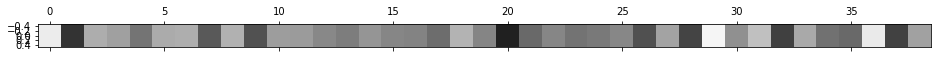

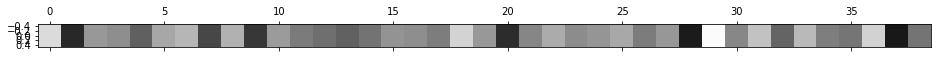

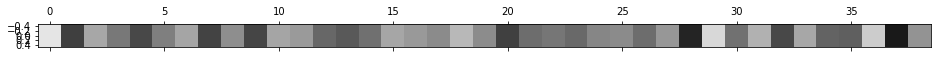

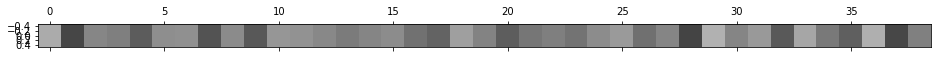

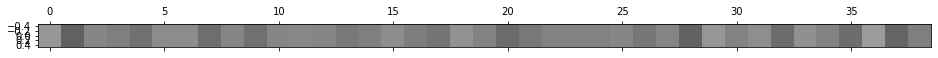

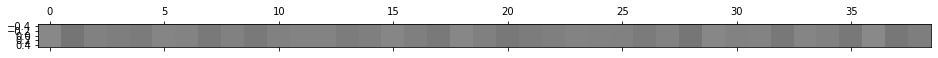

In [14]:
for l in lamb:
    print (l)
    net.load_state_dict(t.load(os.path.join(path_to_save, f'base_net_lam_{l}_start_0.cpk')))
    print (net[0].mean.detach().cpu().numpy().reshape(1, -1))
    plt.matshow(net[0].mean.detach().cpu().numpy().reshape(1, -1), cmap='gray', norm = plt.Normalize(vmin=-2, vmax=2) )

In [8]:
net = var_net.VarNet(base_net.BaseLayer(13, 3, device, prior_sigma=prior_sigma,
                                          act=lambda x:x))   

net = net.to(device)
lam_results = {}
for lam in lamb:
    lam_results[lam] = []
    for s in range(start_num):        
        print (lam, s)
        
        net.load_state_dict(t.load(os.path.join(path_to_save, 'base_net_lam_{}_start_{}.cpk'.format(lam, s))))        
        lam_results[lam].append(utils.delete_10(net, device, lambda:utils.test_acc_net(net, device, test_loader), mode='base'))
lam_results = {float(k):lam_results[k] for k in lam_results}
import json
with open(os.path.join(path_to_save, 'results_base.json'),'w') as out:
    out.write(json.dumps(lam_results))  


KeyboardInterrupt



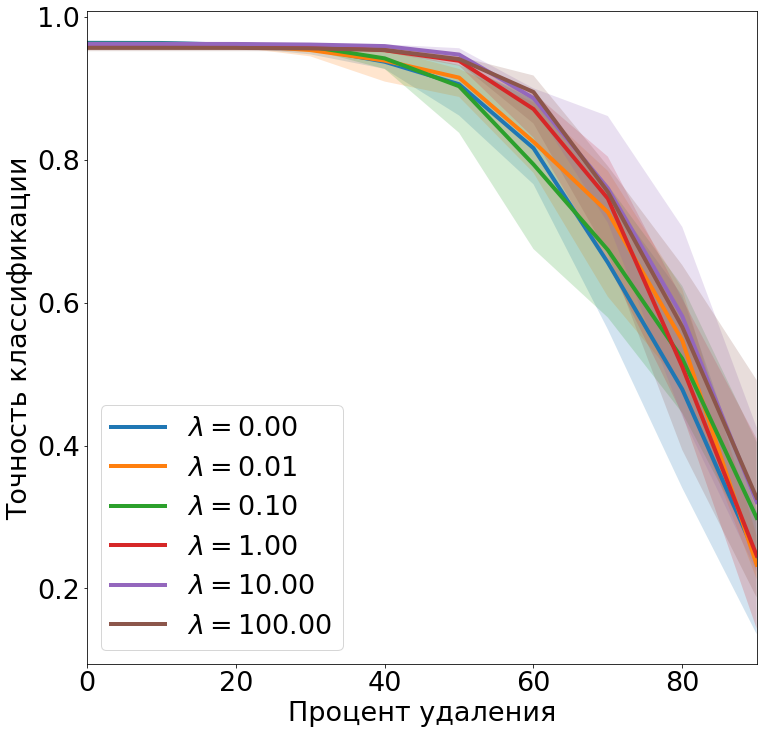

In [9]:
proc = [0,10,20,30,40,50,60,70,80,90]
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams.update({'font.size': 27})
plt.rc('lines', linewidth=4)
    
    
for lam in lamb:
    lam = float(lam)
    lam_str = "{:10.2f}".format(lam)

    plt.fill_between(proc, np.min(lam_results[lam], 0), np.max(lam_results[lam], 0), alpha=0.2)
    plt.plot(proc, np.mean(lam_results[lam], 0), label='$\lambda={}$'.format(lam_str))
plt.ylabel('Точность классификации', fontsize = 27)
plt.xlabel('Процент удаления', fontsize = 27)
plt.tick_params(axis='both', which='major', labelsize=27)
plt.legend(loc='lower left')
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Base')
#plt.show()
